# Problématique :

### Vous êtes Alice Avec vos trois amis Bob, Charlie et Dahlia, vous êtes placés en file sur des podiums de hauteurs différentes. Nous allons teindre en orange ou indigo vos chevelures de façon aléatoire. Voici un ordre possible :


# <img src="ordre.png" alt="alt text" width="800"/>

### Chaque personne voit seulement les chevelures qui se trouvent devant elle. Le défi, une fois les chevelures teintes chaque personne ne peut mentionner qu'un mot, c'est-à-dire donner sa réponse en disant soit orange soit indigo la question est la suivante : quelle stratégie devez vous mettre en place avec les autres joueurs et joueuses afin de déterminer la couleur de l'ensemble des chevelures avec la plus grande probabilité possible?

# Solution : 

### Une des stratégies possibles implique le concept de parité, 

## Importation des librairies

In [43]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister

## Création du circuit
##### Nous devons créer 4 qubits pour représenter les 4 personnes.

##### Q0 : Alice
##### Q1 : Bob
##### Q2 : Charlie
##### Q3 : Dahlia

In [67]:
QC = QuantumCircuit(4)

## Porte Hadamard
##### Nous appliquons la porte Hadamard sur les 4 qubits pour représenter toutes les combinaisons possibles de teinture où toutes ces combinaisons se trouvent dans un état superposé.

In [68]:
QC.h(0)
QC.h(1)
QC.h(2)
QC.h(3)

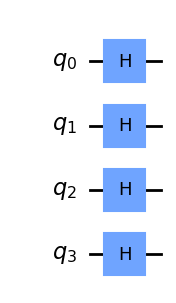

In [69]:
QC.draw(output='mpl')

## Rajout de 4 Qubits
##### Nous rajoutons 4 qubits pour représenter les 4 raisonnements de chaque personne.

##### Raisonnement0 : Raisonnement d'Alice
##### Raisonnement1 : Raisonnement de Bob
##### Raisonnement2 : Raisonnement de Charlie
##### Raisonnement3 : Raisonnement de Dahlia

In [70]:
QC.add_register(QuantumRegister(4, 'Raisonnement'))
QC.barrier()

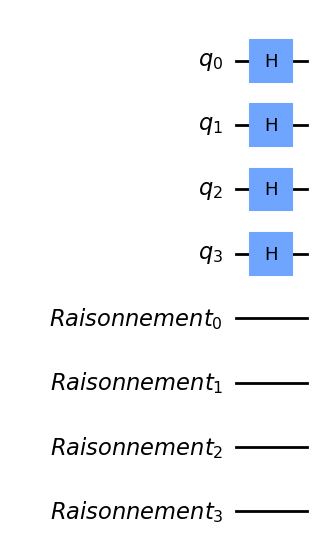

In [71]:
QC.draw(output='mpl')

## Vous voyez les couleurs des trois chevelures devant vous et avec des portes CNOT, vous calculez s'il y a un nombre pair ou impair de chevelures indigo. La réponse se trouve consignée dans l'état du qubit 4 ou qubit de raisonnement d'Alice (Raisonnement0).

In [74]:
#ADD eye image in q0 diagram
QC.cx(1, 4)
QC.cx(2, 4)
QC.cx(3, 4)
QC.barrier()

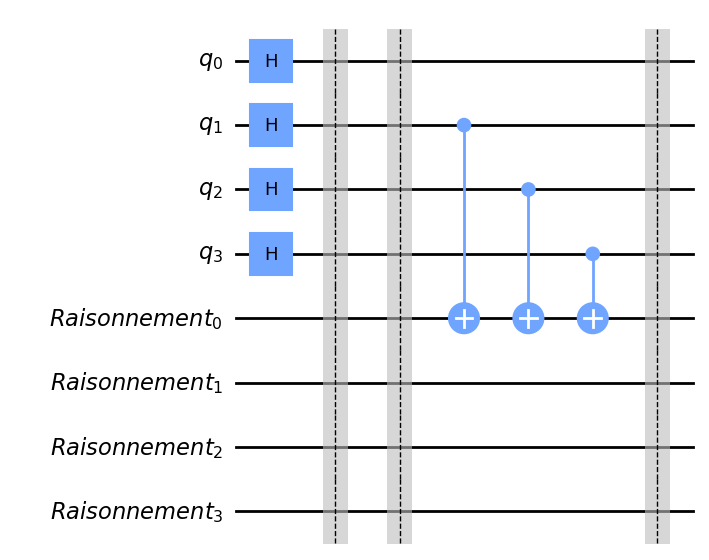

In [75]:
QC.draw(output='mpl')

## Les trois personnes suivantes entendent la réponse et prennent en note la parité des chevelures indigo.

In [76]:
QC.cx(4, 5)
QC.cx(4, 6)
QC.cx(4, 7)
QC.barrier()

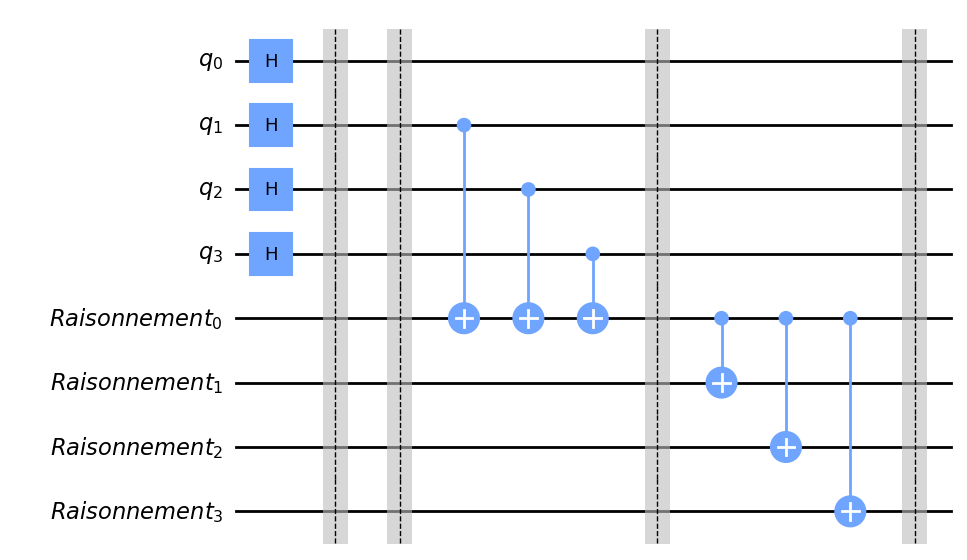

In [77]:
QC.draw(output='mpl')

## Ensuite, Bob voit la couleur des chevelures devant lui et s'en sert pour déterminer la couleur de sa propre chevelure.

In [79]:
QC.cx(2, 5)
QC.cx(3, 5)
QC.barrier()

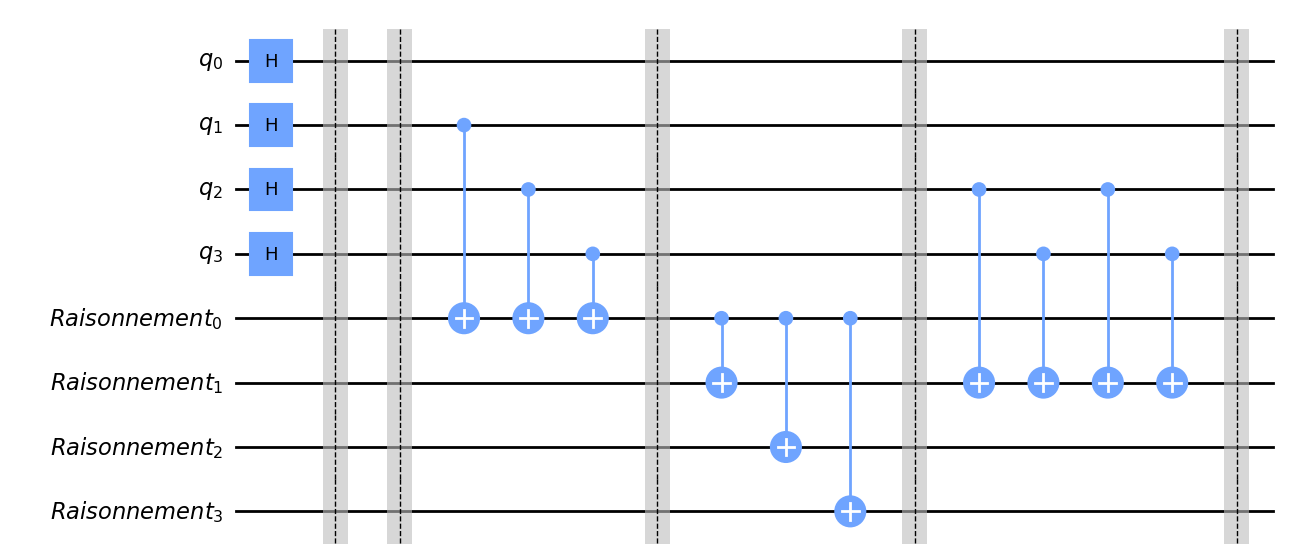

In [80]:
QC.draw(output='mpl')

## Les deux participants restants prennent en note cette couleur.

In [81]:
QC.cx(5, 6)
QC.cx(5, 7)
QC.barrier()

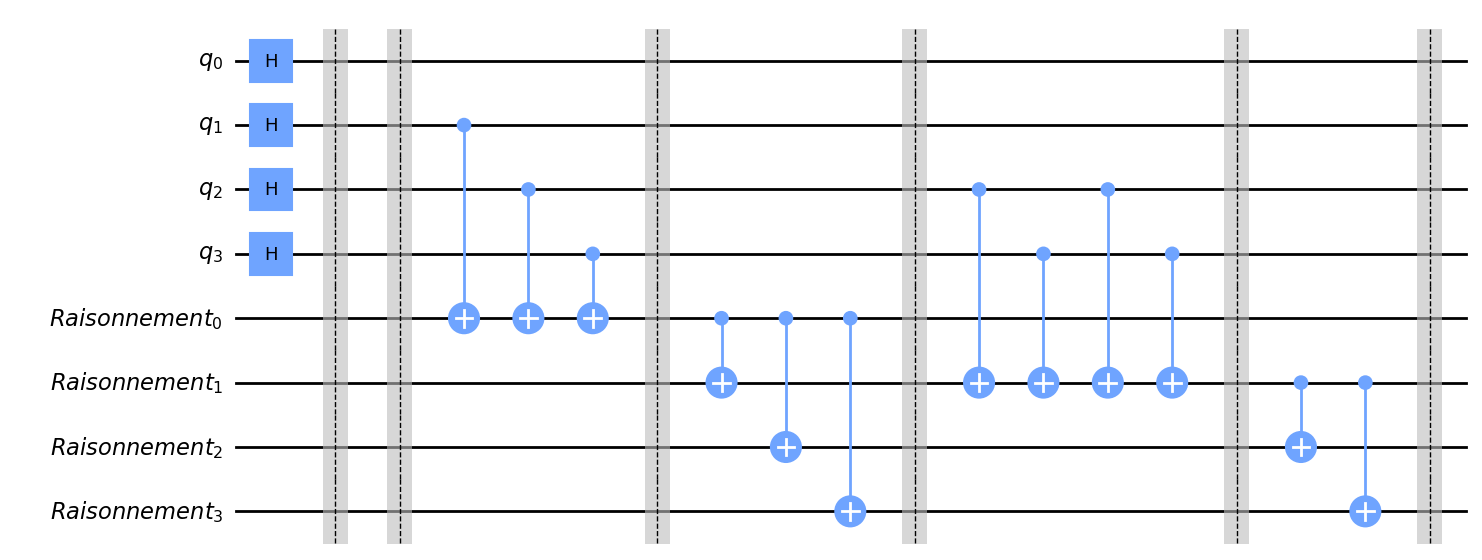

In [82]:
QC.draw(output='mpl')

## Charlie note la couleur de la chevelure devant lui et annonce la couleur de sa propre chevelure.

In [83]:
QC.cx(3, 6)
QC.barrier()

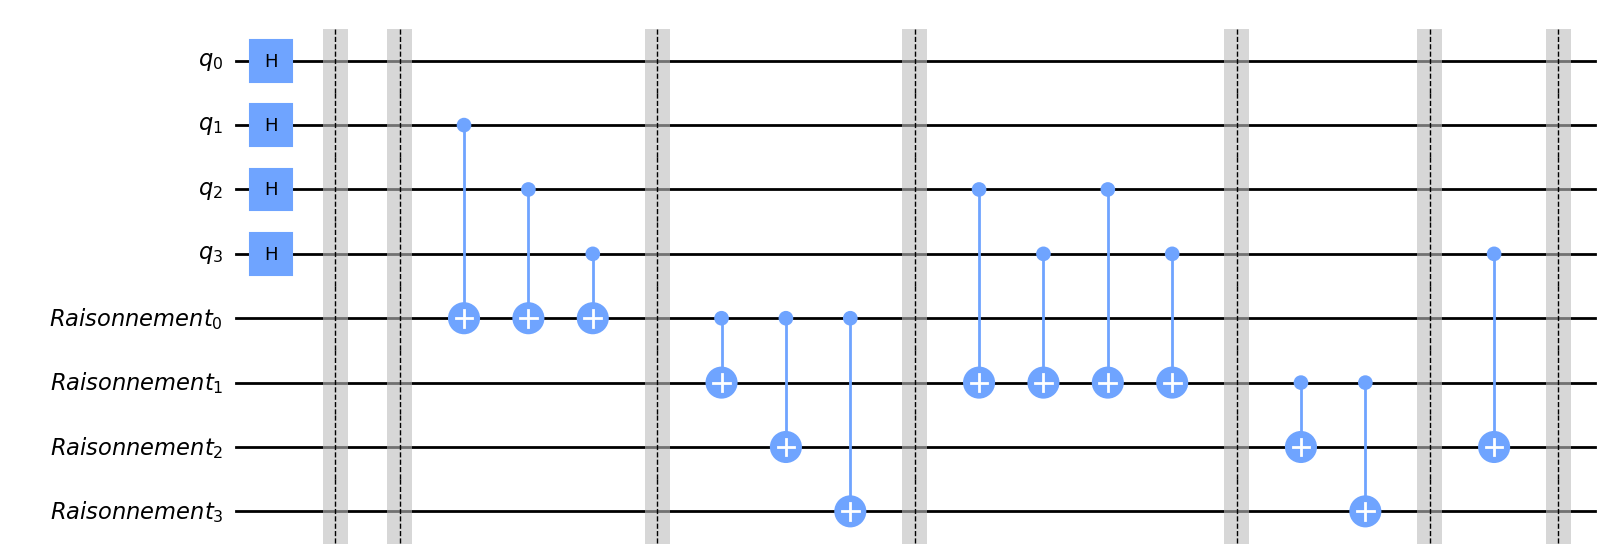

In [84]:
QC.draw(output='mpl')

## Dahlia note finalement cette réponse et annonce la couleur de sa chevelure.

In [85]:
QC.cx(6, 7)

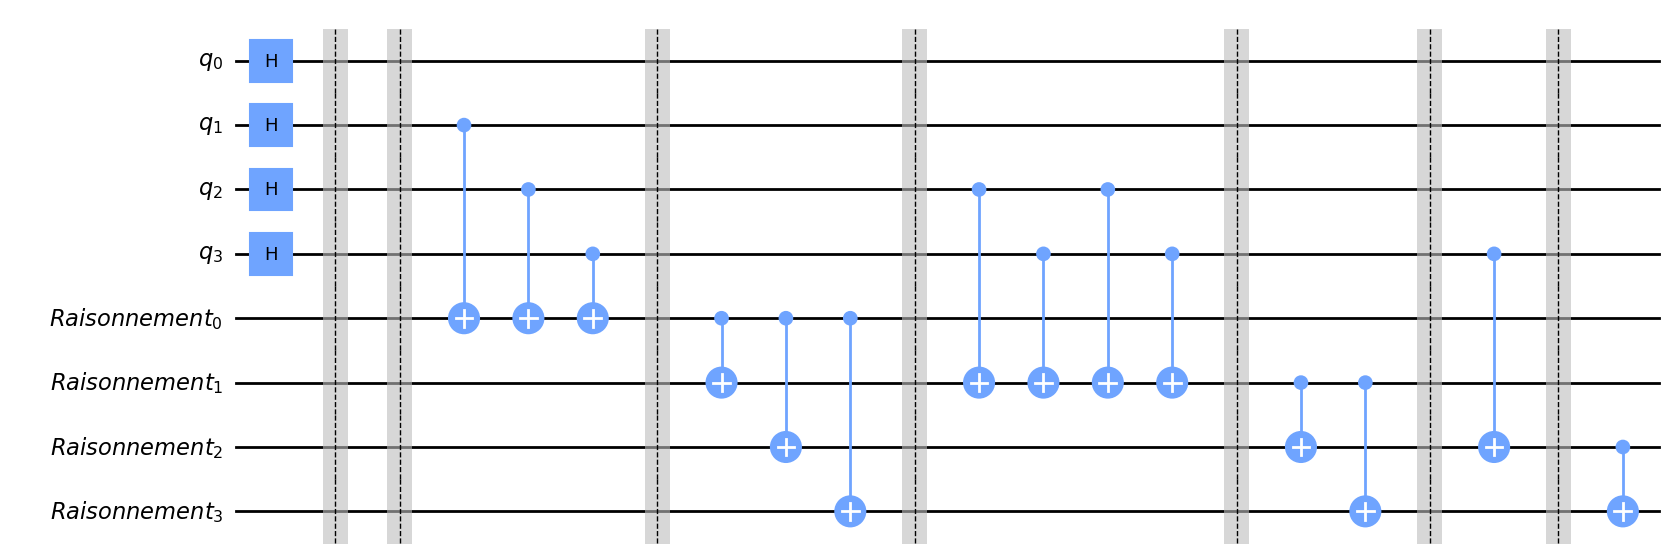

In [86]:
QC.draw(output='mpl')

## Mesurer les qubits

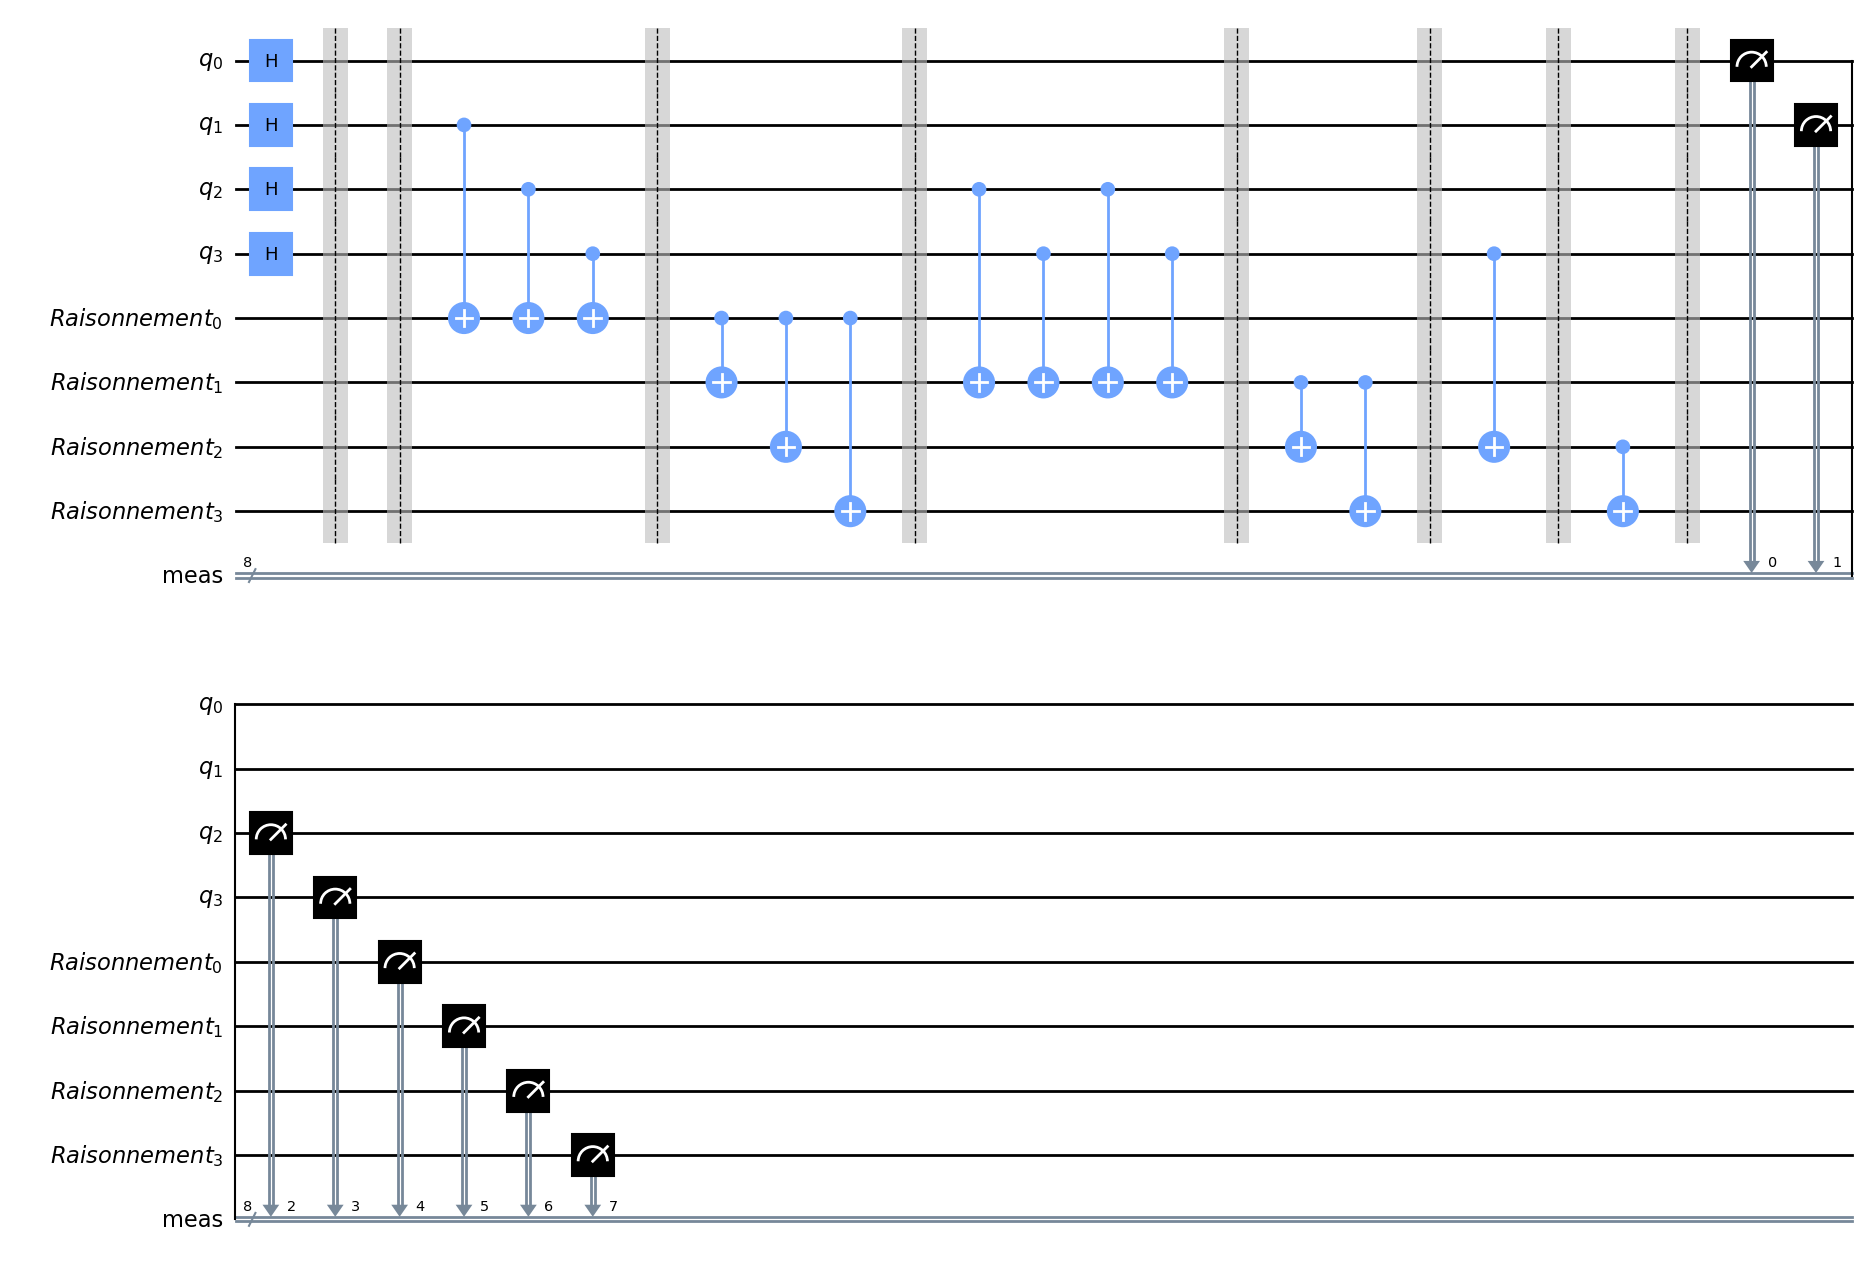

In [87]:
QC.measure_all()
QC.draw(output='mpl')

## Simuler le circuit avec 10000 shots

In [88]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(QC, simulator, shots=10000).result()

## Afficher les résultats

In [89]:
counts = result.get_counts(QC)
counts

{'00110011': 649,
 '11001100': 631,
 '11111000': 607,
 '00000110': 609,
 '11001010': 600,
 '11001011': 666,
 '00110010': 633,
 '00110101': 633,
 '11001101': 615,
 '00110100': 607,
 '11111110': 672,
 '00000000': 610,
 '11111001': 634,
 '11111111': 613,
 '00000001': 624,
 '00000111': 597}

## Afficher les résultats en diagramme

##### 00000000 : Le nombre de chevelures indigo est pair et la la bonne ré

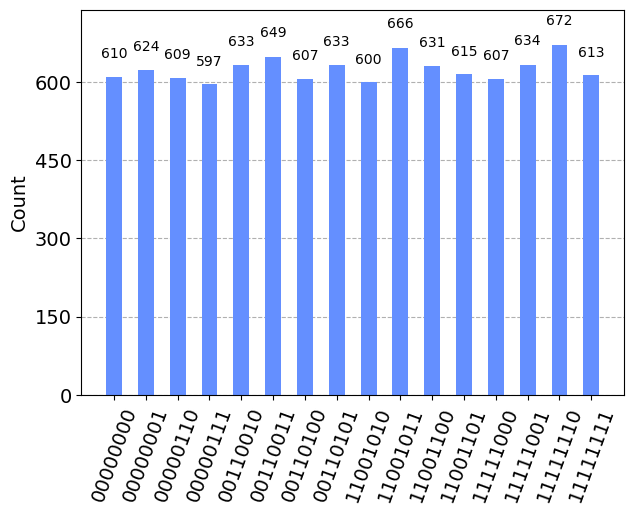

In [90]:
plot_histogram(counts)